In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("transport.csv")
df

,bulan,kuartal,tahun,nama_armada,jenis_transportasi,kategori_transportasi,jumlah_penumpang
0,1,1,2010,Sancaka,Kereta,Darat,2479
1,1,1,2010,Aida Cruises,Kapal Pesiar,Laut,2505
2,1,1,2010,Garuda Indonesia,Pesawat Boeing,Udara,1708
3,1,1,2010,Costa Cruises,Kapal Pesiar,Laut,4372
4,1,1,2010,Bogowonto,Kereta,Darat,1514
...,...,...,...,...,...,...,...
34995,12,4,2012,Costa Cruises,Kapal Pesiar,Laut,8226
34996,12,4,2012,Super Guppy,Pesawat Komersial,Udara,8381
34997,12,4,2012,Airbus A300 / Beluga,Pesawat Komersial,Udara,8702
34998,12,4,2012,Mahkota Taxi,Taxi,Darat,8248


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   bulan                  35000 non-null  int64 
 1   kuartal                35000 non-null  int64 
 2   tahun                  35000 non-null  int64 
 3   nama_armada            35000 non-null  object
 4   jenis_transportasi     35000 non-null  object
 5   kategori_transportasi  35000 non-null  object
 6   jumlah_penumpang       35000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.9+ MB


Berapakah jumlah penumpang total selama tahun 2010-2012? 110363588

In [19]:
table1 = pd.pivot_table(df,index=['tahun'], values=['jumlah_penumpang'], aggfunc=sum, margins=True, margins_name='Total')
table1

,jumlah_penumpang
tahun,
2010,36852173
2011,37231484
2012,36279931
Total,110363588


Berapakah jumlah penumpang total selama tahun 2012? 36279931


In [79]:
table1 = pd.pivot_table(df,index=['tahun'], values=['jumlah_penumpang'], aggfunc=sum, margins=True, margins_name='Total')
table1

,jumlah_penumpang
tahun,
2010,36852173
2011,37231484
2012,36279931
Total,110363588


Berapakah jumlah penumpang total kategori transportasi Udara selama tahun 2010? 10669764


In [10]:
table2 = pd.pivot_table(df,index=['tahun','kategori_transportasi'], values=['jumlah_penumpang'], aggfunc=sum)
table2

jumlah_penumpang
tahun kategori_transportasi                  
2010  Darat                          15943076
      Laut                           10239333
      Udara                          10669764
2011  Darat                          15881945
      Laut                           10831167
      Udara                          10518372
2012  Darat                          15725860
      Laut                           10137423
      Udara                          10416648

Berapakah jumlah penumpang total jenis transportasi Kereta selama tahun 2011? 5178594 	


In [80]:
table3 = pd.pivot_table(df,index=['tahun'],columns=['jenis_transportasi'], values=['jumlah_penumpang'], aggfunc=sum)
table3

jumlah_penumpang                                         \
jenis_transportasi              Bis Kapal Penumpang Kapal Pesiar   Kereta    
tahun                                                                        
2010                        5085820         5027288      5212045   5243512   
2011                        5361186         5416437      5414730   5178594   
2012                        5384821         4965861      5171562   5302871   
Total                      15831827        15409586     15798337  15724977   

                                                                          
jenis_transportasi Pesawat Boeing Pesawat Komersial      Taxi      Total  
tahun                                                                     
2010                      5230978           5438786   5613744   36852173  
2011                      5189711           5328661   5342165   37231484  
2012                      5226770           5189878   5038168   36279931  
Total                    15647459          15957325  15994077  110363588

Berapakah jumlah penumpang jenis transportasi Kapal Pesiar selama bulan Juli – September tahun 2012? 1082946

In [88]:
table4 = pd.pivot_table(df,index=[df.tahun[df.tahun==2012],df.bulan[(df.bulan==7)|(df.bulan==8)|(df.bulan==9)]],columns=['jenis_transportasi'], values=['jumlah_penumpang'], aggfunc=sum)
display(table4)
print(sum(table4['jumlah_penumpang','Kapal Pesiar'].values))

jumlah_penumpang                                       \
jenis_transportasi              Bis Kapal Penumpang Kapal Pesiar Kereta    
tahun  bulan                                                               
2012.0 7.0                   342473          370428       351967  362597   
       8.0                   387208          378536       352334  447684   
       9.0                   406736          361933       378645  404452   

                                                             
jenis_transportasi Pesawat Boeing Pesawat Komersial    Taxi  
tahun  bulan                                                 
2012.0 7.0                 377895            421778  288846  
       8.0                 436081            354473  359200  
       9.0                 386887            312845  390145

1082946


Berapakah jumlah penumpang KM Kerinci selama Kuartal ke-4 tahun 2011? 294425

In [8]:
table5 = pd.pivot_table(df,index=[df.tahun[df.tahun==2011],df.kuartal],columns=[df.nama_armada[df.nama_armada=='KM Kerinci']], values=['jumlah_penumpang'], aggfunc=sum)
table5

jumlah_penumpang
nama_armada          KM Kerinci
tahun  kuartal                 
2011.0 1                 224663
       2                 284570
       3                 278112
       4                 294425

Dibandingkan dengan tahun 2010, terjadi kenaikan atau penurunan jumlah penumpang pada tahun 2012? Penurunan

In [9]:
table6 = pd.pivot_table(df,index=df.tahun[(df.tahun==2010)|(df.tahun==2012)], values=['jumlah_penumpang'], aggfunc=sum)
table6

,jumlah_penumpang
tahun,
2010.0,36852173
2012.0,36279931


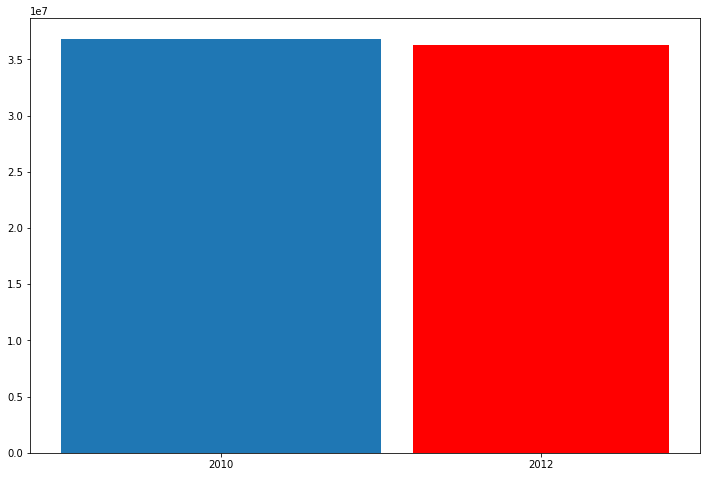

In [8]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(figsize=(12,8))
ax.bar('2010',36852173, width=1)
ax.bar('2012',36279931, color='red')
plt.show()

Kategori transportasi apakah yang paling sedikit diminati selama kuartal 3 tahun 2011? Udara


In [16]:
table7 = pd.pivot_table(df,index=[df.tahun[df.tahun==2011],df.kuartal[df.kuartal==3]],columns=['kategori_transportasi'], values=['jumlah_penumpang'], aggfunc=sum)
table7

jumlah_penumpang                  
kategori_transportasi            Darat     Laut    Udara
tahun  kuartal                                          
2011.0 3.0                     3528914  2291534  2273867

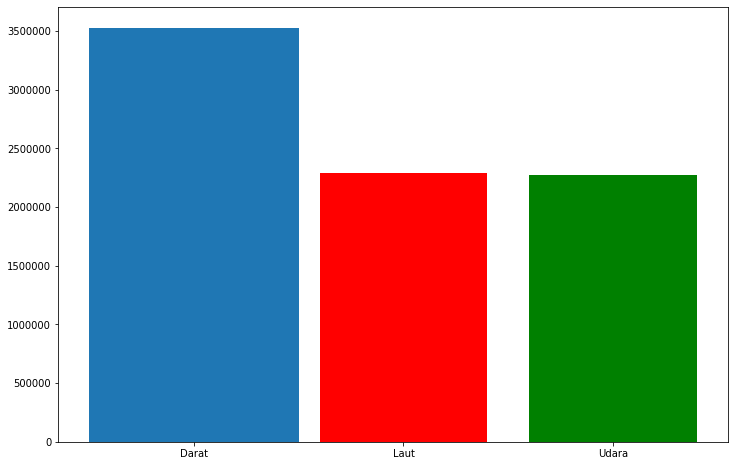

In [24]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(figsize=(12,8))
ax.bar('Darat',table7.loc[2011,3]['jumlah_penumpang','Darat'], width=1)
ax.bar('Laut',table7.loc[2011,3]['jumlah_penumpang','Laut'], color='red')
ax.bar('Udara',table7.loc[2011,3]['jumlah_penumpang','Udara'], color='green')
plt.show()

Pada setiap bulan apakah selalu terjadi lonjakan jumlah penumpang selama tahun 2010-2012?
Lonjakan terjadi setiap bulan Desember

In [24]:
table8 = pd.pivot_table(df,index=[df.tahun,df.bulan],columns=['jenis_transportasi'],values=['jumlah_penumpang'], aggfunc=sum)
display(table8)

jumlah_penumpang                                        \
jenis_transportasi              Bis Kapal Penumpang Kapal Pesiar  Kereta    
tahun bulan                                                                 
2010  1                      320385          359157       366854   378717   
      2                      380870          404637       370022   394762   
      3                      336911          341514       399656   401181   
      4                      405387          339449       395462   376802   
      5                      362764          378227       311472   409286   
      6                      359361          355987       406750   397771   
      7                      435960          363933       333824   337540   
      8                      371790          352314       382694   368301   
      9                      373223          409412       394720   424812   
      10                     349532          380162       380616   364463   
      11                     349124          401733       330054   410196   
      12                    1040513          940763      1139921   979681   
2011  1                      373254          418624       391853   356738   
      2                      400153          391800       395401   325973   
      3                      421884          387596       343931   383076   
      4                      390031          365039       383088   411708   
      5                      383593          398706       424072   389722   
      6                      418787          428996       416972   371269   
      7                      359644          385212       403341   396833   
      8                      367109          339656       350122   386983   
      9                      426158          426496       386707   353787   
      10                     375267          387445       359284   386299   
      11                     423915          431339       398920   378124   
      12                    1021391         1055528      1161039  1038082   
2012  1                      367180          309325       415580   324939   
      2                      399116          345279       404417   366628   
      3                      390932          405545       308079   396515   
      4                      396510          365214       364597   370752   
      5                      385966          326472       392291   389543   
      6                      383683          399635       351860   407194   
      7                      342473          370428       351967   362597   
      8                      387208          378536       352334   447684   
      9                      406736          361933       378645   404452   
      10                     427388          311832       375813   369434   
      11                     384711          423569       376782   377022   
      12                    1112918          968093      1099197  1086111   

                                                              
jenis_transportasi Pesawat Boeing Pesawat Komersial     Taxi  
tahun bulan                                                   
2010  1                    348120            405813   383067  
      2                    403601            390884   407298  
      3                    413136            394906   412521  
      4                    359763            363851   396690  
      5                    362579            395137   460246  
      6                    387897            369468   351617  
      7                    373217            344945   388862  
      8                    347057            416639   404744  
      9                    453155            380582   433476  
      10                   372865            425047   393810  
      11                   350100            361695   408189  
      12                  1059488           1189819  1173224  
2011  1                    409726            346282   369550  
      2

In [26]:
table9 = pd.pivot_table(df,index=['tahun','bulan'],values=['jumlah_penumpang'], aggfunc=sum)
table9

jumlah_penumpang
tahun bulan                  
2010  1               2562113
      2               2752074
      3               2699825
      4               2637404
      5               2679711
      6               2628851
      7               2578281
      8               2643539
      9               2869380
      10              2666495
      11              2611091
      12              7523409
2011  1               2666027
      2               2612236
      3               2727644
      4               2645032
      5               2813806
      6               2788522
      7               2773436
      8               2606765
      9               2714114
      10              2653512
      11              2772086
      12              7458304
2012  1               2552456
      2               2587794
      3               2614768
      4               2668684
      5               2671812
      6               2666252
      7               2515984
      8               2715516
      9               2641643
      10              2557067
      11              2734199
      12              7353756

In [35]:
tahun2010 = table9.loc[2010]['jumlah_penumpang'].values
tahun2011 = table9.loc[2011]['jumlah_penumpang'].values
tahun2012 = table9.loc[2012]['jumlah_penumpang'].values

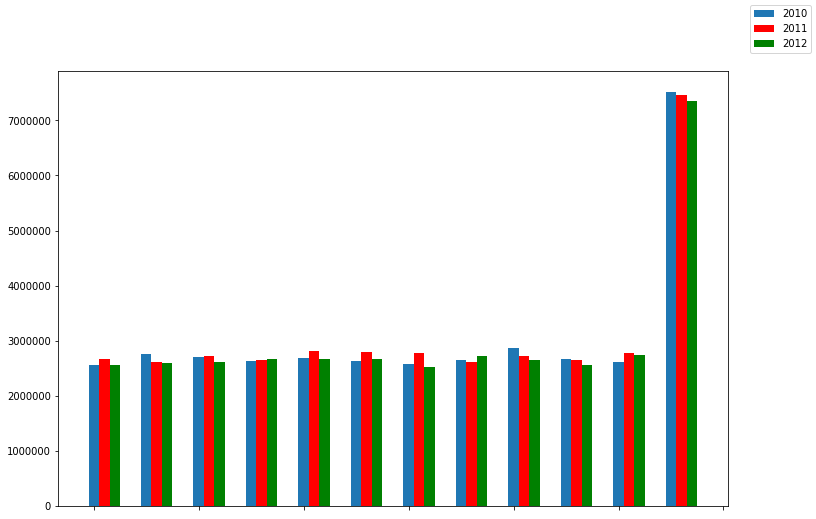

In [50]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(figsize=(12,8))
x = np.arange(12)
ax.bar(x,tahun2010,0.2,label='2010')
ax.bar(x+0.2,tahun2011,0.2, color='red',label='2011')
ax.bar(x+0.4,tahun2012,0.2, color='green',label='2012')
ax.set_xticklabels([0])
fig.legend()
plt.show()

Untuk tahun 2013, jenis transportasi apakah yang perlu ditambah pada bulan dimana terjadi lonjakan penumpang berdasarkan jumlah penumpang terbanyak tahun sebelumnya? Perisiapan pada bulan Desember untuk Bis jika dilihat dari tahun 2012


In [53]:
table10 = pd.pivot_table(df,index=[df.tahun,df.bulan[df.bulan==12]],columns=['jenis_transportasi'],values=['jumlah_penumpang'], aggfunc=sum)
display(table10)

jumlah_penumpang                                        \
jenis_transportasi              Bis Kapal Penumpang Kapal Pesiar  Kereta    
tahun bulan                                                                 
2010  12.0                  1040513          940763      1139921   979681   
2011  12.0                  1021391         1055528      1161039  1038082   
2012  12.0                  1112918          968093      1099197  1086111   

                                                              
jenis_transportasi Pesawat Boeing Pesawat Komersial     Taxi  
tahun bulan                                                   
2010  12.0                1059488           1189819  1173224  
2011  12.0                1026329           1068626  1087309  
2012  12.0                1053899           1017113  1016425

In [73]:
bis = table10['jumlah_penumpang','Bis'].values
kapalp = table10['jumlah_penumpang','Kapal Penumpang'].values
kapalpes = table10['jumlah_penumpang','Kapal Pesiar'].values
pesawatb = table10['jumlah_penumpang','Pesawat Boeing'].values
pesawatk = table10['jumlah_penumpang','Pesawat Komersial'].values
taxi = table10['jumlah_penumpang','Taxi'].values
keretas = table10['jumlah_penumpang','Kereta '].values

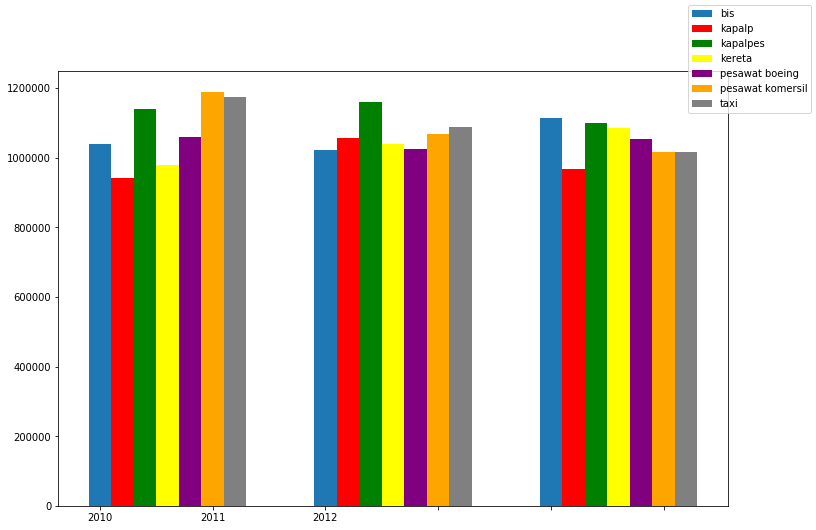

In [78]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(figsize=(12,8))
x = np.arange(3)
ax.bar(x,bis,0.1,label='bis')
ax.bar(x+0.1,kapalp,0.1, color='red',label='kapalp')
ax.bar(x+0.2,kapalpes,0.1, color='green',label='kapalpes')
ax.bar(x+0.3,keretas,0.1, color='yellow',label='kereta')
ax.bar(x+0.4,pesawatb,0.1, color='purple',label='pesawat boeing')
ax.bar(x+0.5,pesawatk,0.1, color='orange',label='pesawat komersil')
ax.bar(x+0.6,taxi,0.1, color='gray',label='taxi')
ax.set_xticklabels([0,2010,2011,2012])
fig.legend()
plt.show()